In [ ]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')


samples = samples_published + samples_new

def plot_fault_block(names,save=False,filename=None):
    smps = [smp for smp in samples if smp.name in names]
    
    nplots = len(names)
    height = nplots*1.5
    
    fig,axs = plt.subplots(nplots,dpi=300,figsize=(7.5,height))
    
    if len(names)==1:
        smp = smps[0]
        smp.kde(ax=axs)
        axs.set_title(smp.name)
        axs.set_xlim(100,4000)
    
    else:
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k])
            axs[k].set_title(smp.name)
            axs[k].set_xlim(100,4000)

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

['N3', 'N2', 'N1', 'CT130918-2A']


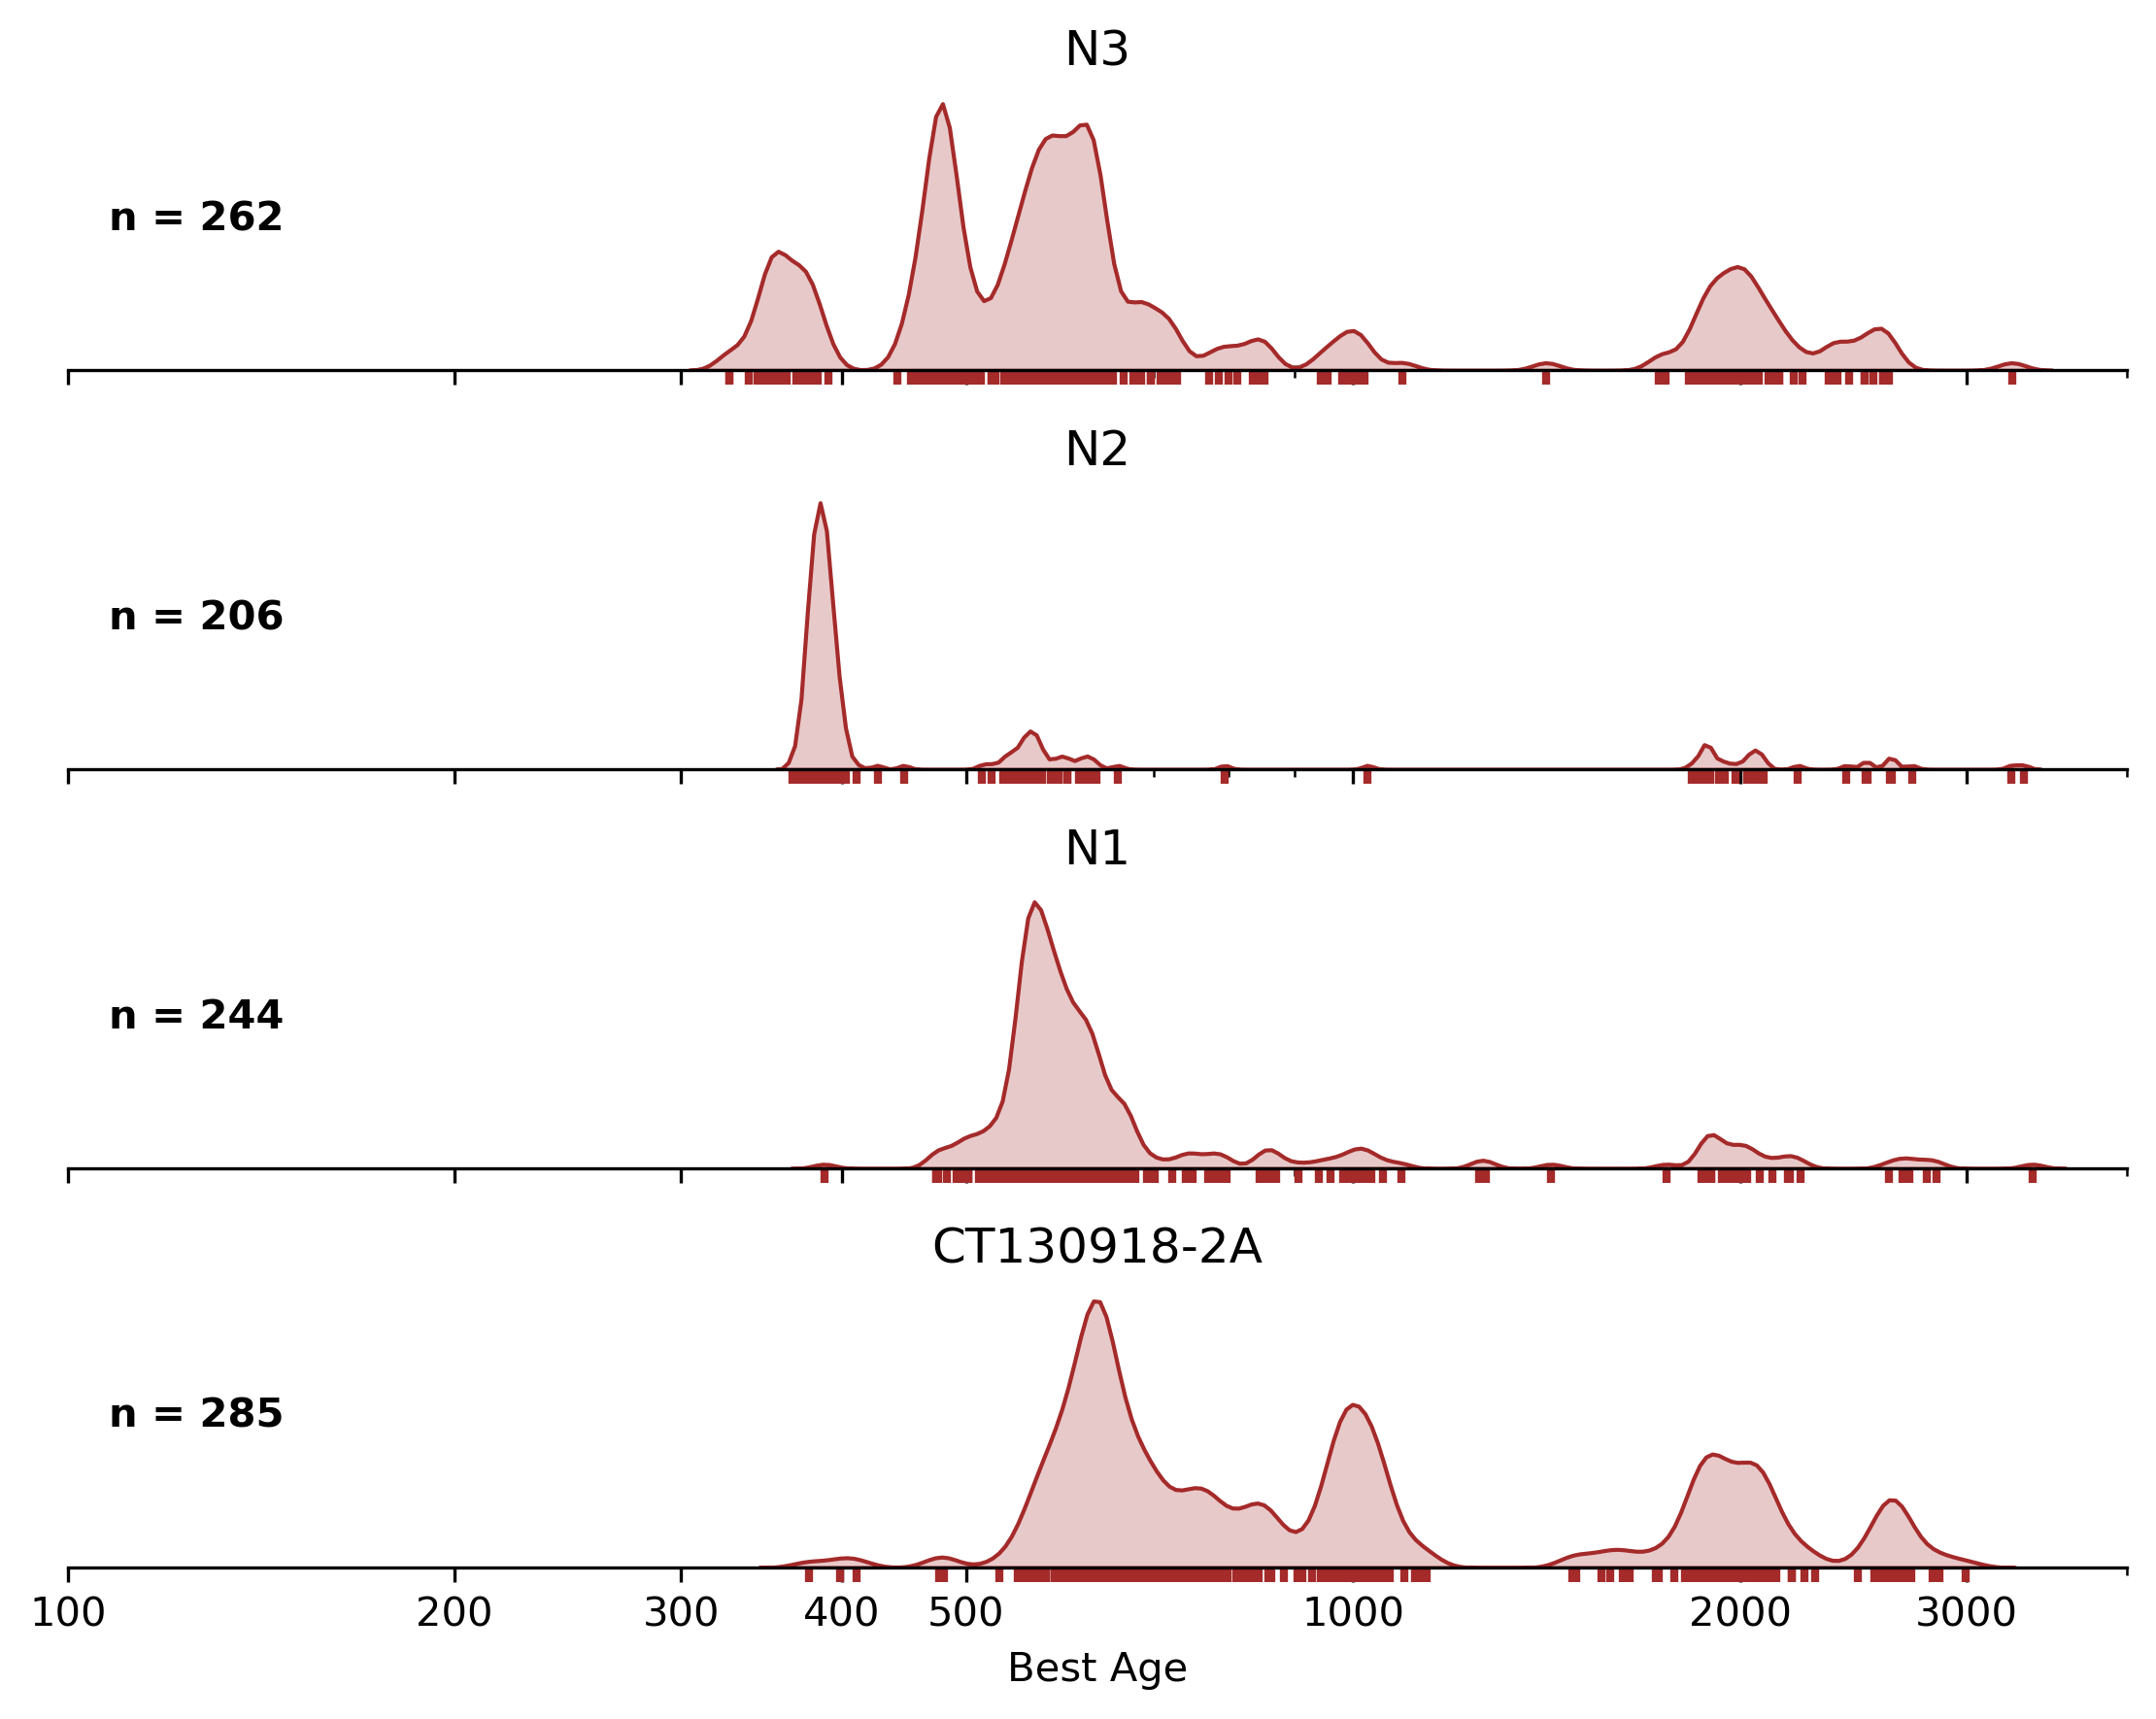

In [43]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg > 320) & (n > 15) & ~modern:
        sample.color = 'brown'
        smps.append(sample.name)

print(smps)

plot_fault_block(smps,save=True,filename='Pz.pdf')


['NW-GC', 'N5', '100211-9A', 'CT130918-9A']


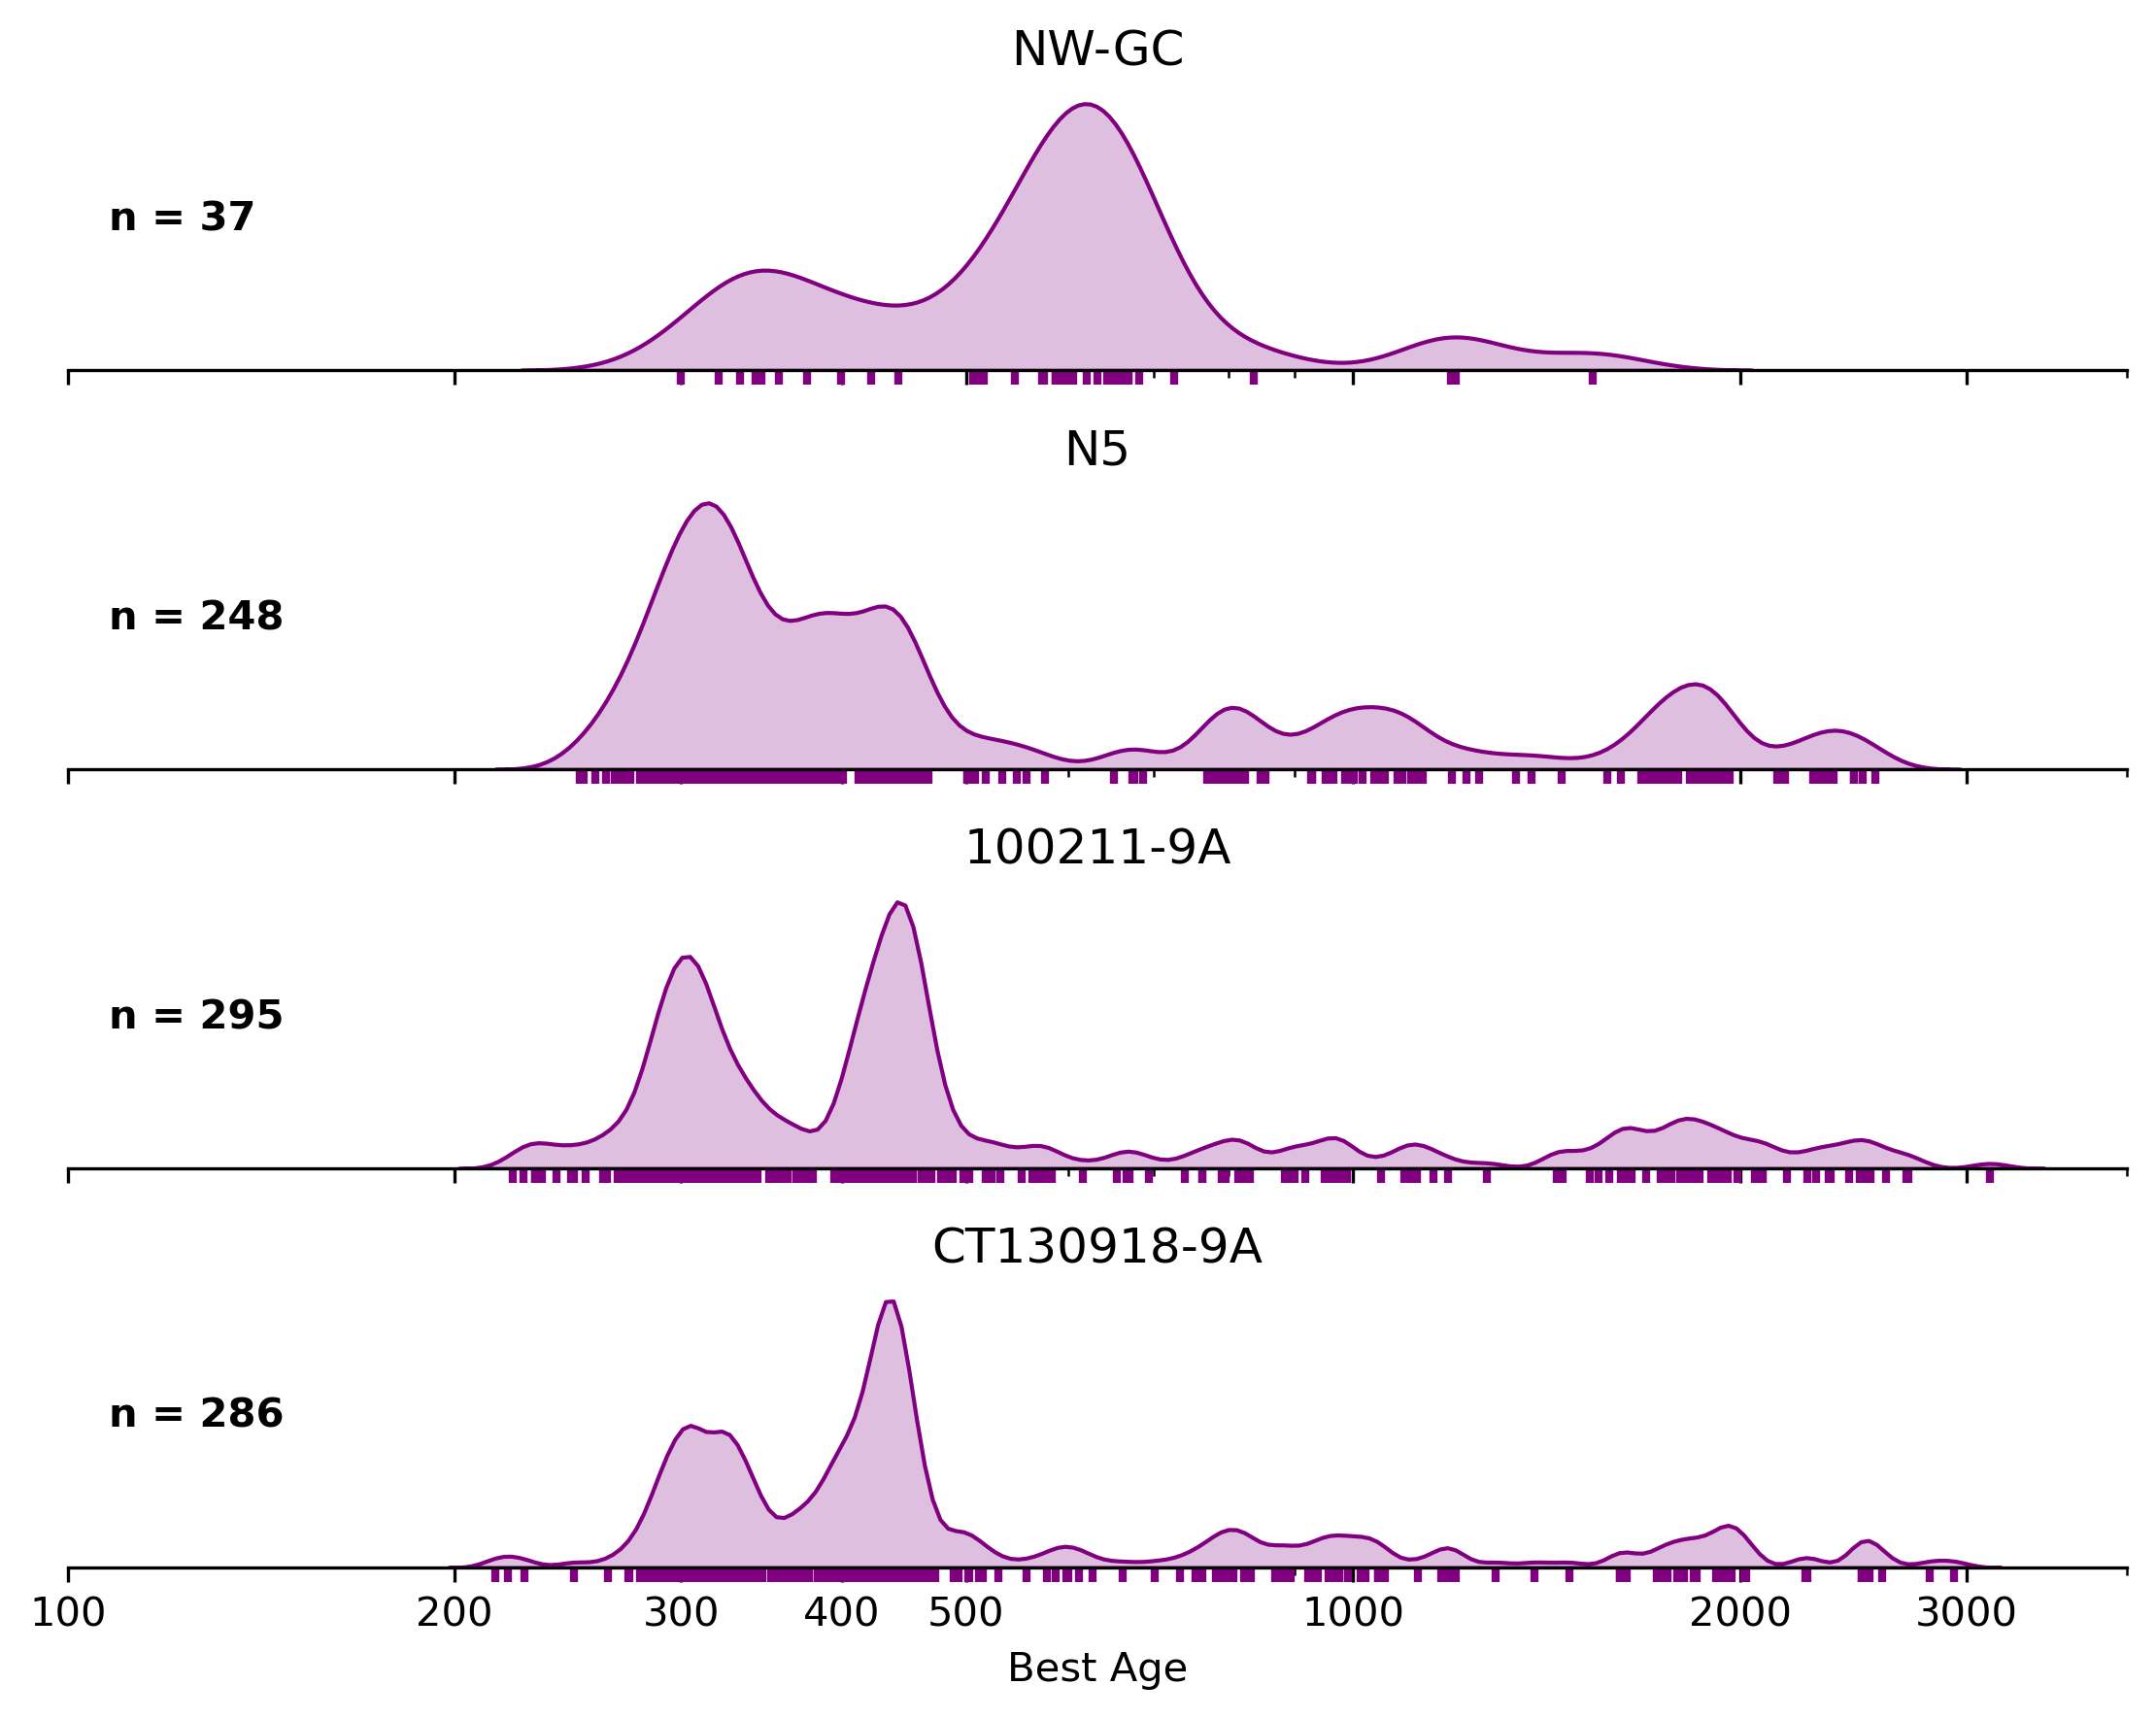

In [44]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg < 320) & (ysg > 200) & (n > 15) & ~modern & ~('K' in sample.name) & ~('N4' in sample.name):
        sample.color = 'purple'
        smps.append(sample.name)

print(smps)

plot_fault_block(smps,save=True,filename='PTr.pdf')

196.6 (Jurassic)
Tithonian
Bajocian
J2
J2
J1
J1
['K3', 'NE-GC', 'GC41', 'CT15076', '100411-5', 'CT130919-5A', 'AB0913']


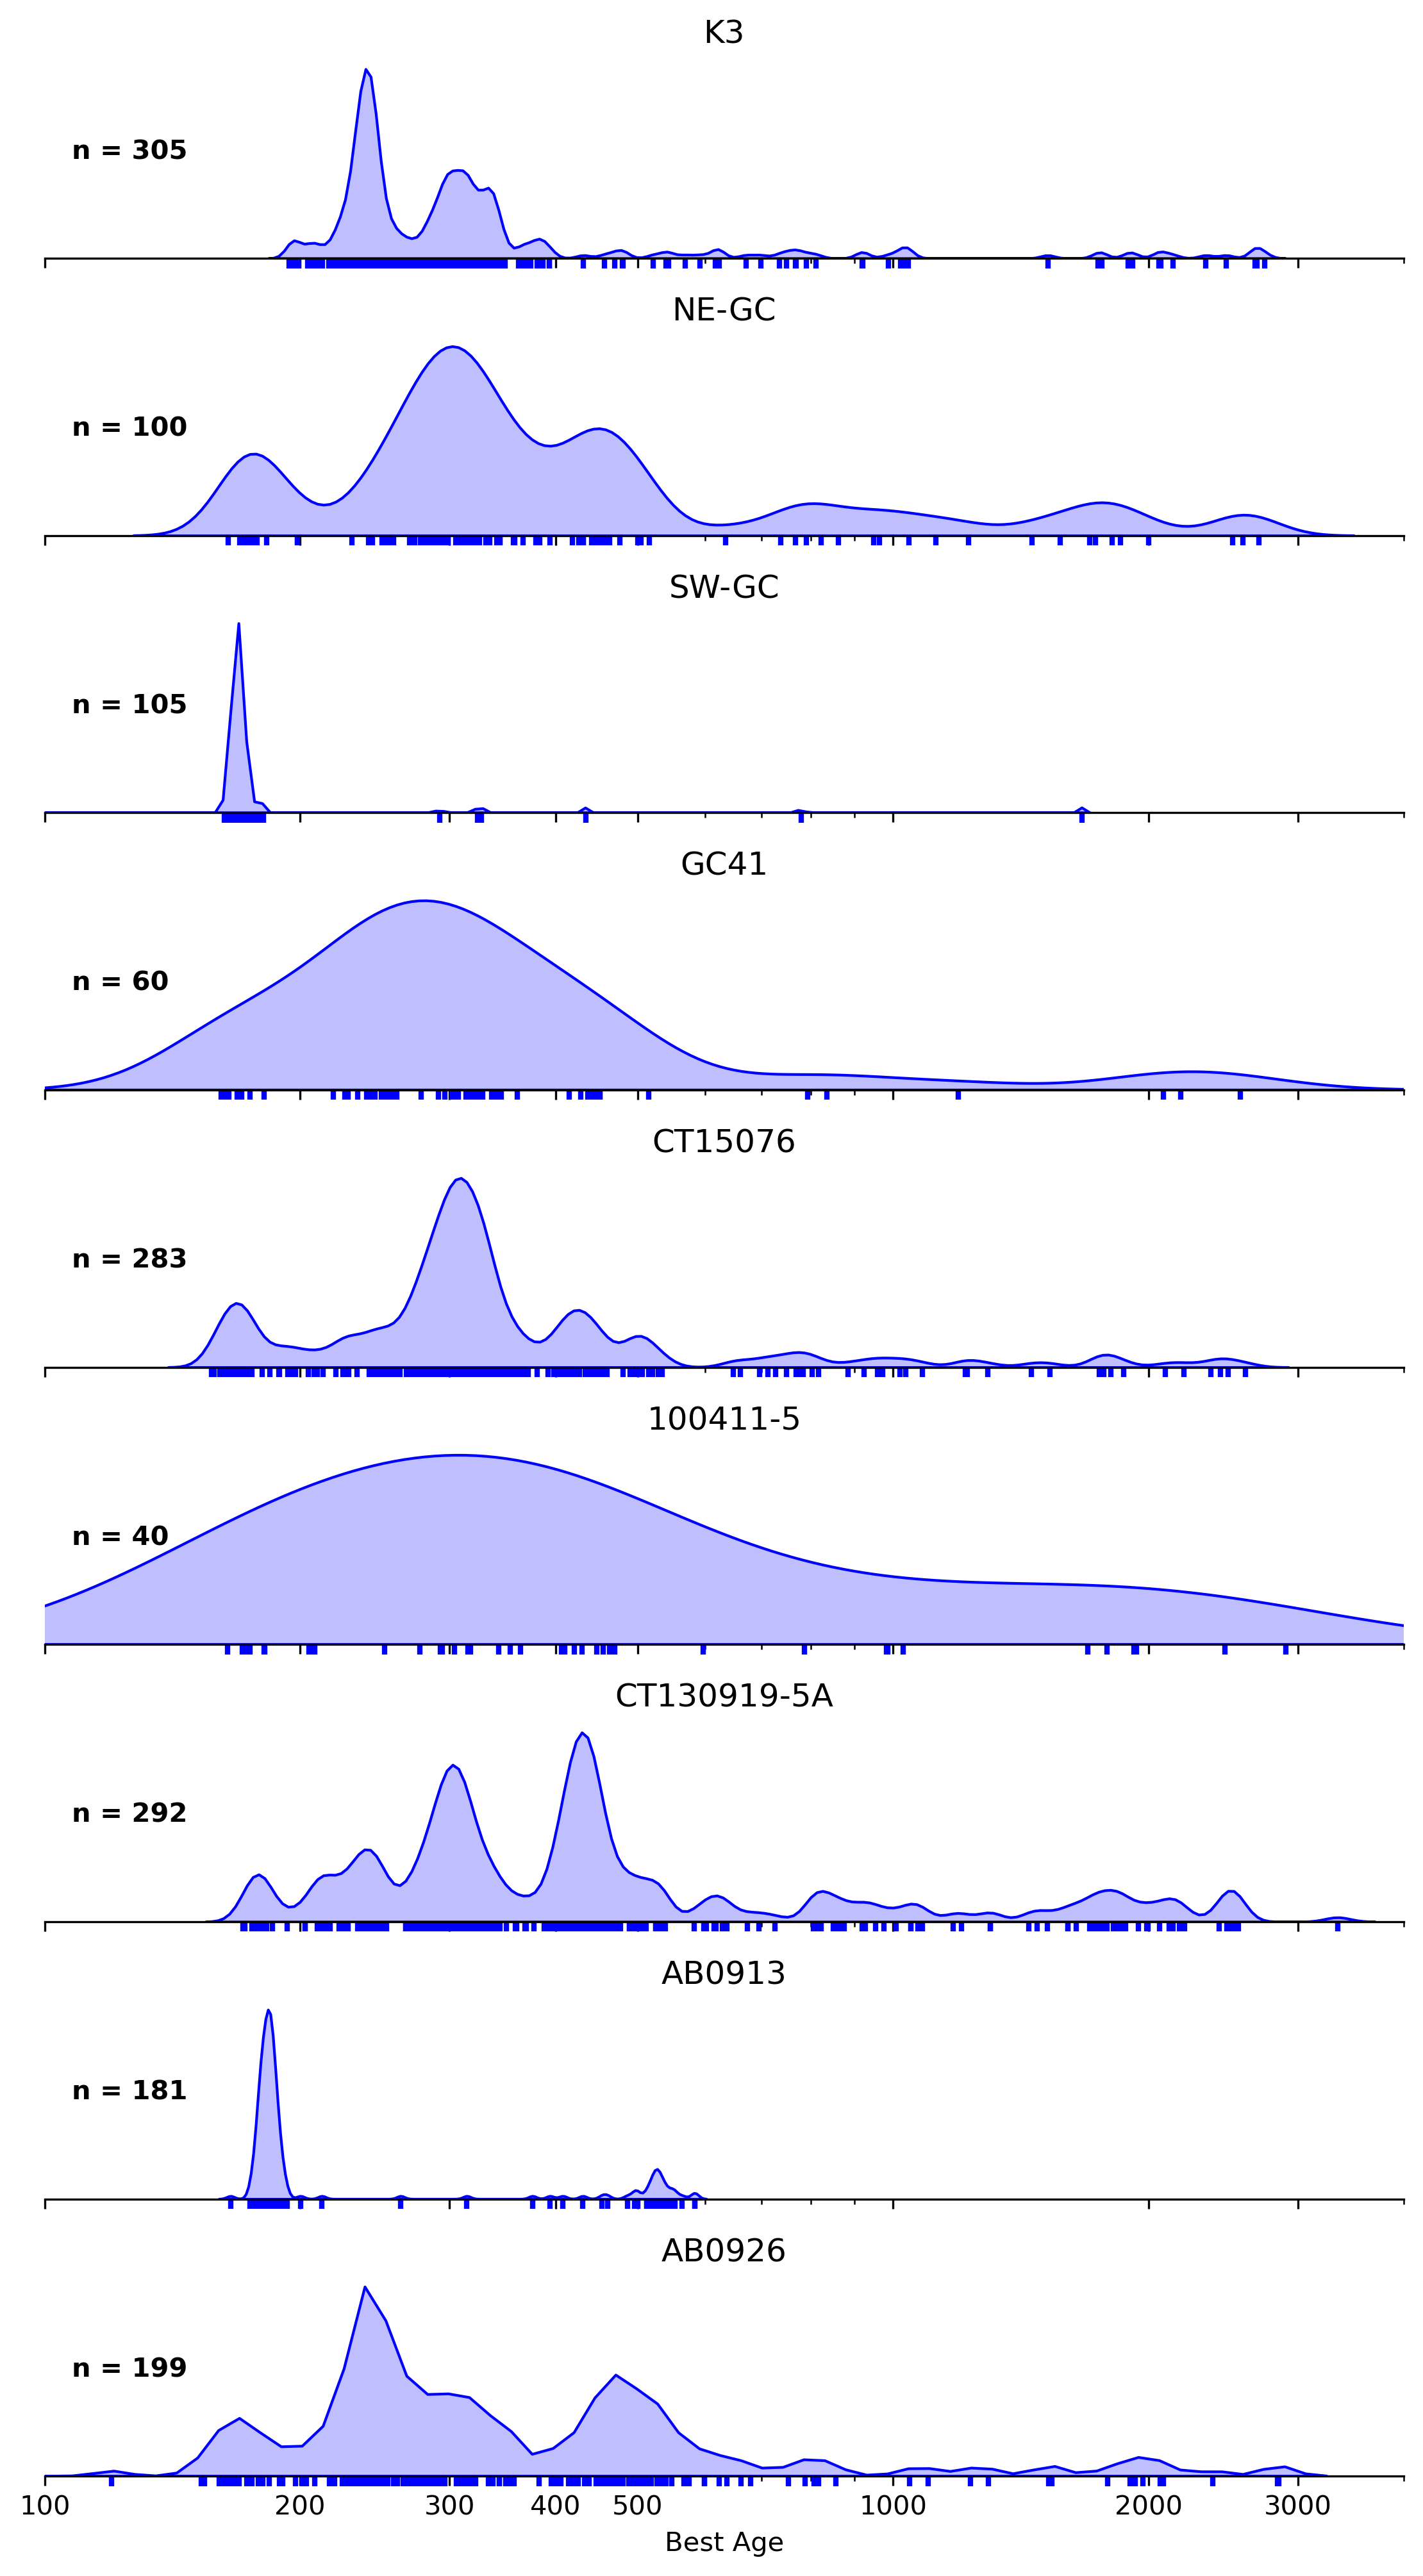

In [45]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if ((ysg < 200) & (ysg > 140) & (n > 15) & ~modern & ~('W' in sample.name)):
        sample.color = 'blue'
        smps.append(sample.name)
        print(sample.reported_age)

print(smps)

plot_fault_block(smps + ['AB0926','SW-GC'], save=True,filename='J.pdf')

Cenomanian
K1
K1
K2
['SE-GC', '100211-1A', 'CT15092', 'CT15113']


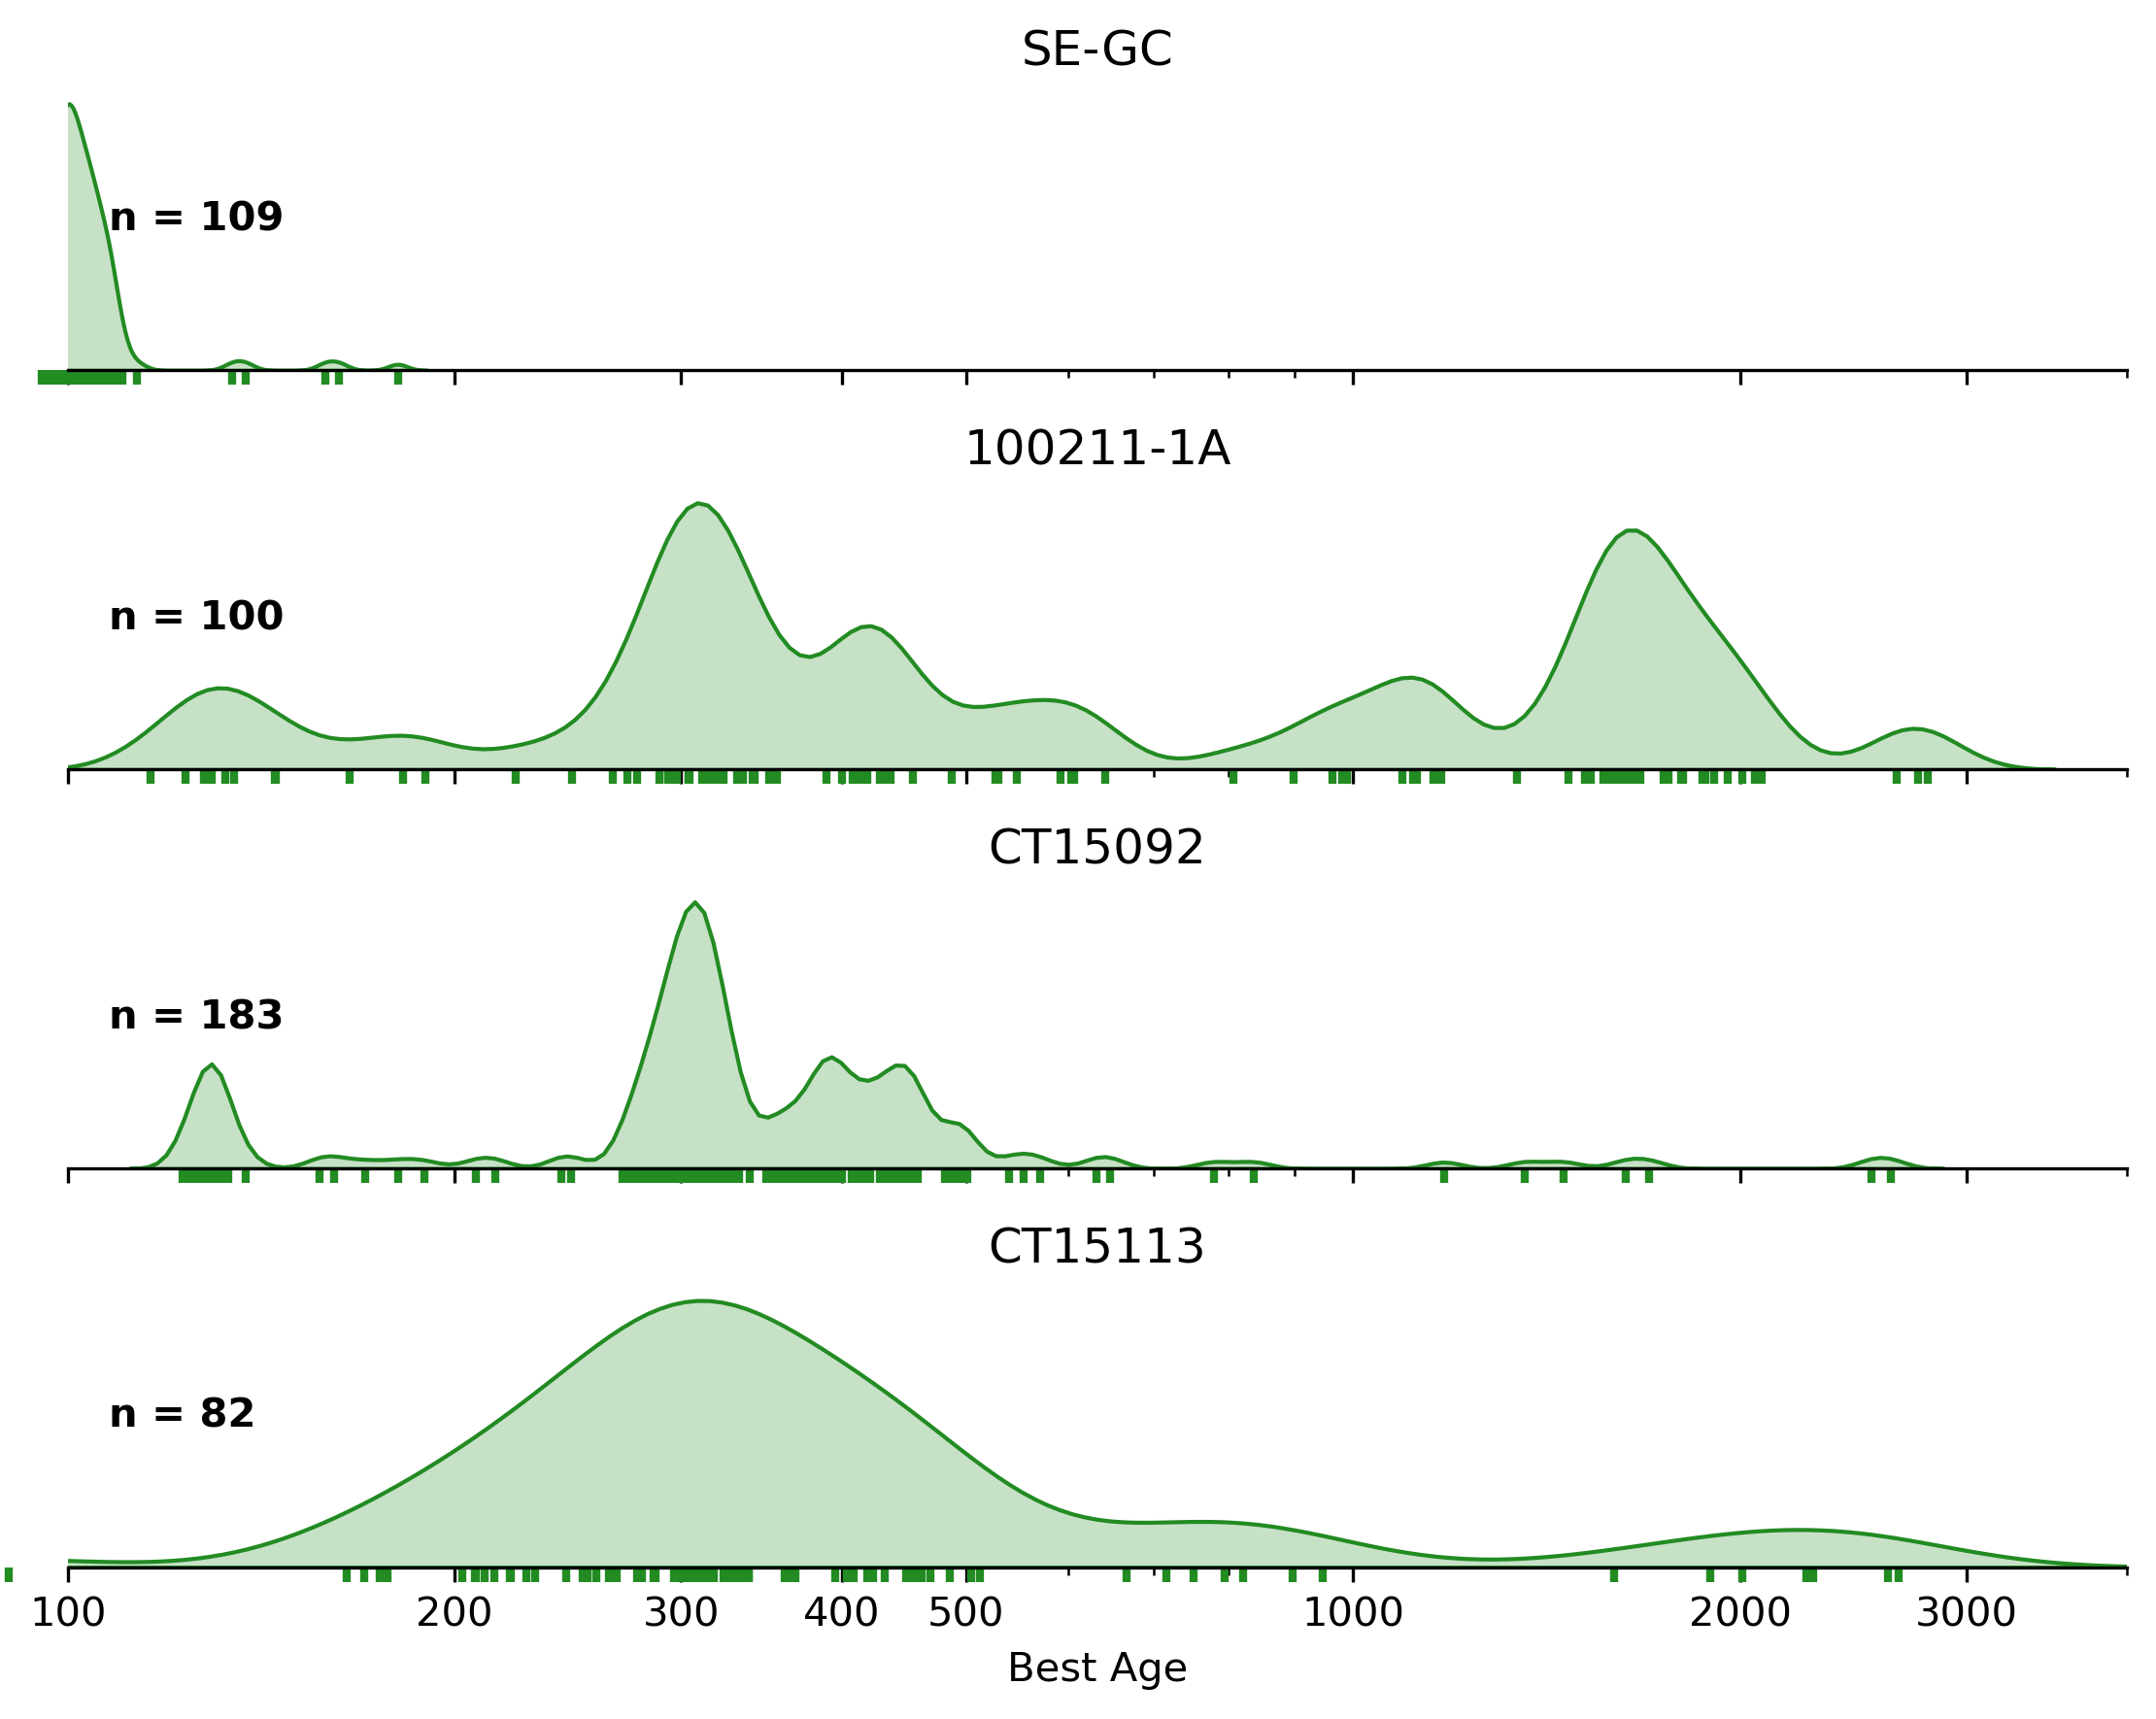

In [46]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg < 140) & (ysg > 60) & (n > 15) & ~modern & ~('F' in sample.name) & ~('W' in sample.name) & ~('ILN' in sample.name):
        sample.color = 'forestgreen'
        smps.append(sample.name)
        print(sample.reported_age)

print(smps)

plot_fault_block(smps,save=True,filename='K.pdf')